In [22]:
import xml.etree.ElementTree as ET
import pandas as pd

In [23]:
# Load the XML file
tree = ET.parse('data_folder_xDD/drugbank_copy_pasted.xml')
root = tree.getroot()

In [25]:
# Define a list to hold the data
targets = []

# Use the namespace to access elements
ns = {'ns': 'http://www.drugbank.ca'}

for drug in root:
    for target in drug.find('ns:targets', ns):
        row = {
            'drug id': drug.find('ns:drugbank-id', ns).text,
            'target id': target.find('ns:id', ns).text,
        }
        poly = target.find('ns:polypeptide', ns)
        if poly is not None:
            row['source'] = poly.get('source')
            row['source id'] = poly.get('id')
            row['polypeptide name'] = poly.find('ns:name', ns).text
            row['gene name'] = poly.find('ns:gene-name', ns).text

            # GenAtlas // just getting the target.gene-name would probably be better since it's the same
            for e_id in poly.find('ns:external-identifiers', ns):
                if e_id[0].text == 'GenAtlas' :
                    row['GenAtlas ID'] = e_id[1].text
                    break

            row['chromosome location'] = poly.find('ns:chromosome-location', ns).text
            row['cellular location'] = poly.find('ns:cellular-location', ns).text

        targets.append(row)

targets = pd.DataFrame(targets)

targets # (7) done

,drug id,target id,source,source id,polypeptide name,gene name,GenAtlas ID,chromosome location,cellular location
0,DB00001,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,DB00002,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,DB00002,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,DB00002,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,DB00002,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...,...
262,DB00107,BE0000844,Swiss-Prot,P30559,Oxytocin receptor,OXTR,OXTR,3,Cell membrane
263,DB00108,BE0000590,Swiss-Prot,P13612,Integrin alpha-4,ITGA4,ITGA4,2,Membrane
264,DB00108,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
265,DB00108,BE0000710,Swiss-Prot,P12314,High affinity immunoglobulin gamma Fc receptor I,FCGR1A,FCGR1A,1,Cell membrane


In [42]:
locations = targets['cellular location'].value_counts()
locations

cellular location
Cell membrane                                                    104
Secreted                                                          61
Membrane                                                          56
Cytoplasm                                                          9
Cytoplasmic vesicle                                                4
Endoplasmic reticulum membrane                                     4
Endoplasmic reticulum lumen                                        3
Peroxisome                                                         1
Endoplasmic reticulum-Golgi intermediate compartment membrane      1
Endoplasmic reticulum-Golgi intermediate compartment               1
Cytoplasmic                                                        1
Nucleus                                                            1
Late endosome membrane                                             1
Mitochondrion matrix                                               1
Name: count, dty

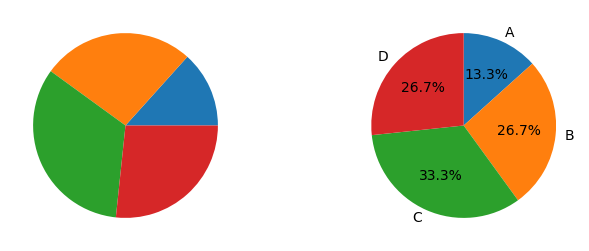

In [68]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,3))

# Panel lewy
y = [10, 20, 25, 20]
plt.subplot(1, 2, 1)
# Narysuj wykres kołowy
plt.pie(y)

# Panel prawy
plt.subplot(1, 2, 2)
# Narusyje ten sam wykres z etykietami i udziałem oraz zmianą kierunku i lokalizacji elementów wykresu
labels = ['A','B','C','D']
plt.pie(y, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)

plt.show()

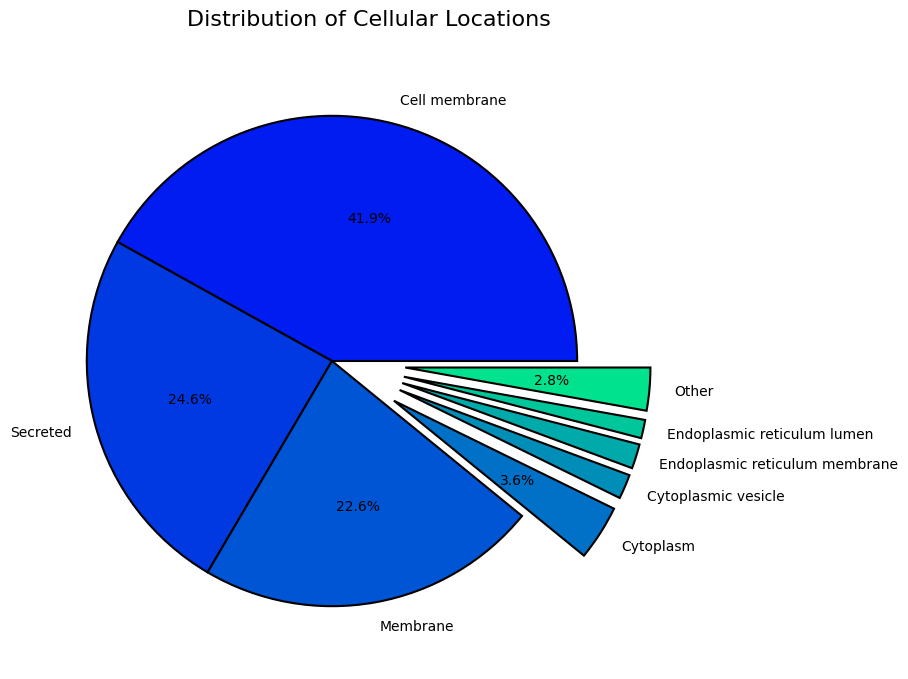

In [109]:
import matplotlib.pyplot as plt

# Assuming 'locations' is a Series from the previous step
locations = targets['cellular location'].value_counts()

# Define a threshold for grouping small slices
threshold = 1  # You can adjust this value (e.g., 1%, 2%, etc.)

# Group small slices into "Other"
small_slices = locations[locations / locations.sum() * 100 < threshold]
locations = locations[locations / locations.sum() * 100 >= threshold]
locations['Other'] = small_slices.sum()

threshold = 20
# Create an explosion array
explode = [0.3 if (value / locations.sum() * 100) < threshold else 0 for value in locations]

# Custom function to display percentages only if they are greater than 3%
def autopct_greater_than_3(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

# nice colors
colors = ['#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80', ]

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the chart
plt.pie(
    locations,
    labels=locations.index,  # Use the unique locations as labels
    autopct=autopct_greater_than_3,
    # colors=plt.cm.Pastel1.colors,  # Use a pastel color scheme
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Add edges to the slices
    explode = explode
)

# Add a title
plt.title('Distribution of Cellular Locations', fontsize=16, pad=20)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()      # (8) doneS